In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/rollercoaster-database/coaster_db.csv
/kaggle/input/rollercoaster-database/flipflap.jpg


In [2]:
df= pd.read_csv('../input/rollercoaster-database/coaster_db.csv')

### Step-01 Data Understanding

In [3]:
df= df[['coaster_name', 
     #'Length', 'Speed', 
     'Location', 'Status', 
     #'Opening date',
      # 'Type',
     'Manufacturer', 
     #'Height restriction', 'Model', 'Height',
      # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
      # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
      # 'Track layout', 'Fastrack available', 'Soft opening date.1',
      # 'Closing date', 
     'Opened', 
     #'Replaced by', 'Website',
      # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #   'Single rider line available', 'Restraint Style',
      # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
     'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
     #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
     #'height_value', 'height_unit', 
     'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()
df.head()

,coaster_name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [4]:
df.shape

(1087, 14)

df.shape

In [5]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
Opened                 object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [6]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
Opened                        object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [7]:
df=df.rename(columns={'coaster_name': 'Coaster_Name','year_introduced': 'Year_Introduced',  
                  'opening_date_clean':'Opening_Date_Clean', 'speed_mph': 'Speed_Mph', 
                   'height_ft': 'Height_Ft', 'Inversions_clean': 'Inversions',
                  'Gforce_clean': 'Gforce'}).copy()


In [8]:
df.isna().sum()

Coaster_Name             0
Location                 0
Status                 213
Manufacturer            59
Opened                1060
Year_Introduced          0
latitude               275
longitude              275
Type_Main                0
Opening_Date_Clean     250
Speed_Mph              150
Height_Ft              916
Inversions               0
Gforce                 725
dtype: int64

In [9]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_Mph,Height_Ft,Inversions,Gforce


In [10]:
df.loc[df.duplicated(subset =['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_Mph,Height_Ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,NaN,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [11]:
df.loc[(df["Coaster_Name"]     =="Crystal Beach Cyclone")]

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_Mph,Height_Ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [12]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_Mph,Height_Ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [13]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main',
       'Opening_Date_Clean', 'Speed_Mph', 'Height_Ft', 'Inversions', 'Gforce'],
      dtype='object')

In [14]:
df = df.loc[~df.duplicated(subset =['Coaster_Name', 'Location','Opening_Date_Clean' ])].reset_index(drop=True).copy()
df

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_Mph,Height_Ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,NaN,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,NaN,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [15]:
df.shape

(990, 14)

Text(0, 0.5, 'Count')

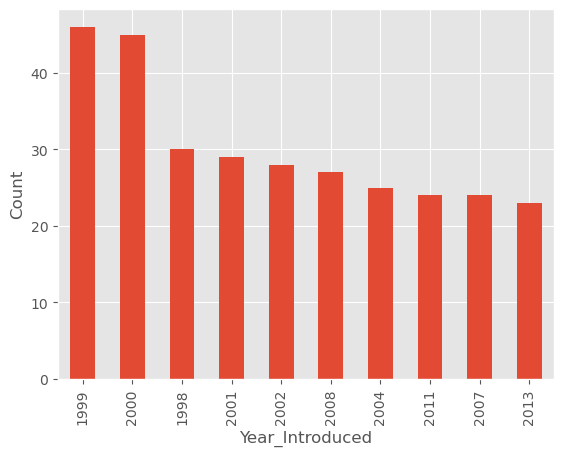

In [16]:
ax = df['Year_Introduced'].value_counts()\
 .head(10) \
 .plot(kind='bar')
ax.set_xlabel('Year_Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'speed mph')

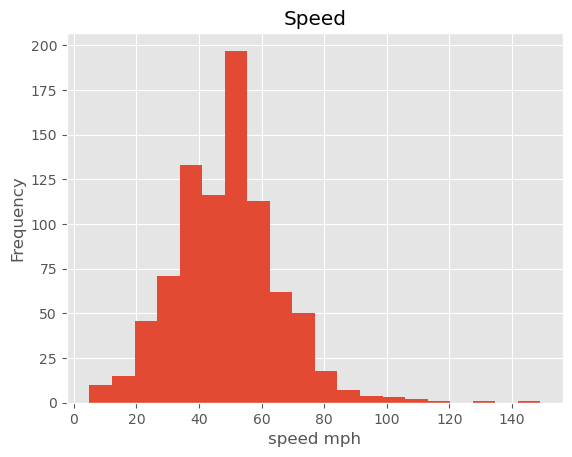

In [17]:
ax = df['Speed_Mph'].plot(kind ='hist', bins=20, title = 'Speed')
ax.set_xlabel('speed mph')

Text(0.5, 0, 'speed mph')

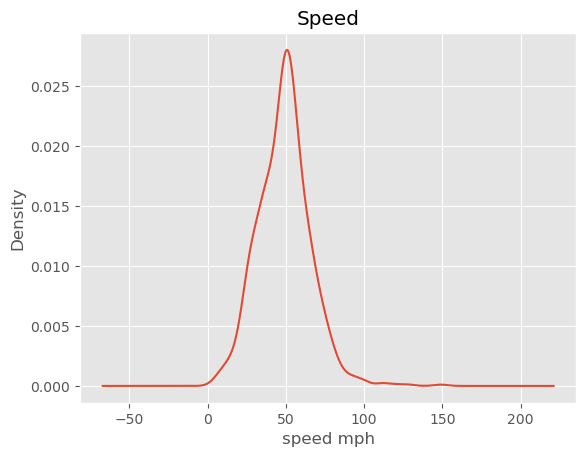

In [18]:
ax = df['Speed_Mph'].plot(kind ='kde', title = 'Speed')
ax.set_xlabel('speed mph')

# Feature relationship: Scatterplot, Heatmap correlation, pairplot, and Groupby comparsions

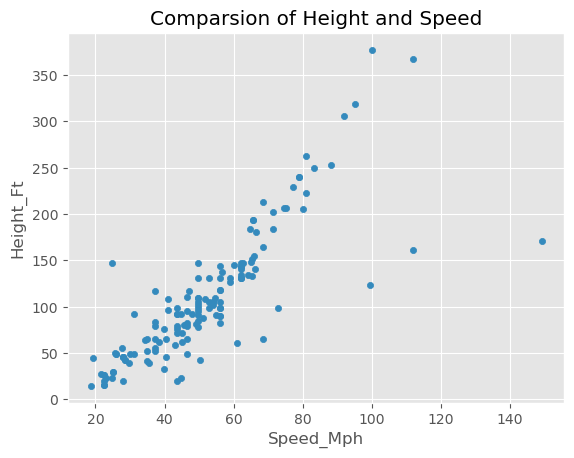

In [19]:
df.plot(kind='scatter', x='Speed_Mph', y = 'Height_Ft', title='Comparsion of Height and Speed')
plt.show()

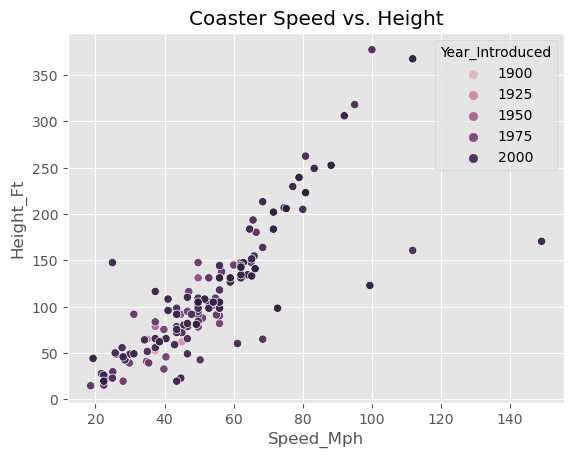

In [20]:
ax = sns.scatterplot(data=df, x='Speed_Mph', y = 'Height_Ft',hue='Year_Introduced')
ax.set_title('Coaster Speed vs. Height')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


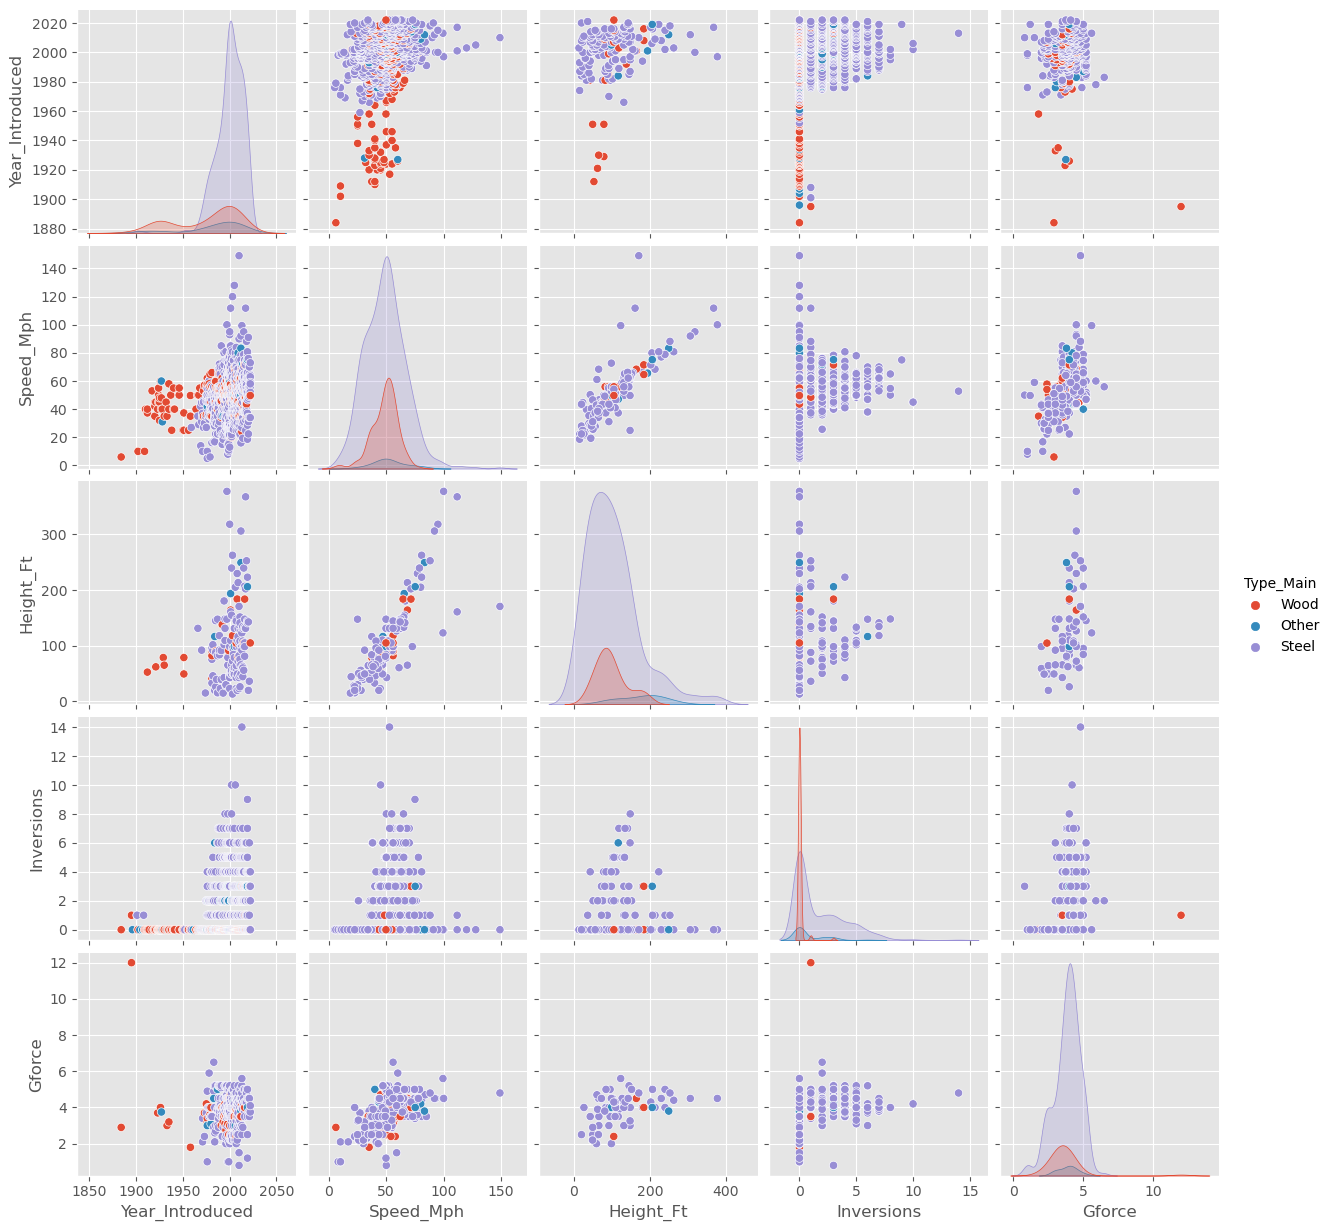

In [21]:
sns.pairplot (df, vars=['Year_Introduced','Speed_Mph' ,'Height_Ft', 'Inversions','Gforce'],hue='Type_Main', kind='scatter')
plt.show()

In [22]:
df_corr = df[['Year_Introduced','Speed_Mph' ,'Height_Ft', 'Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_Mph,Height_Ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_Mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_Ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

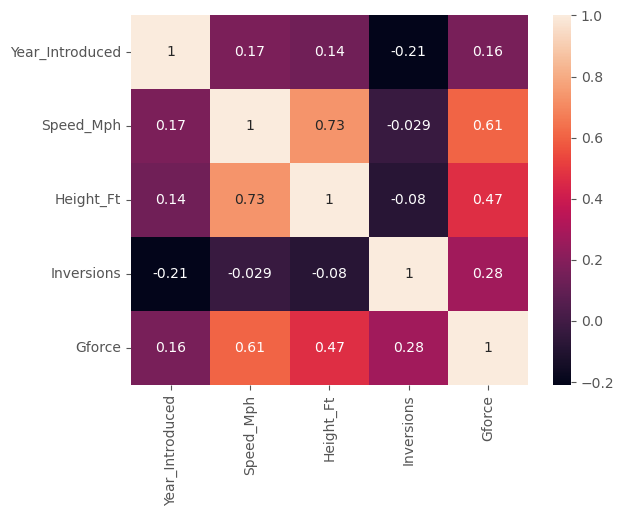

In [23]:
sns.heatmap(df_corr,annot=True )

# What are the locations with fastest roller coasters

In [24]:
df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

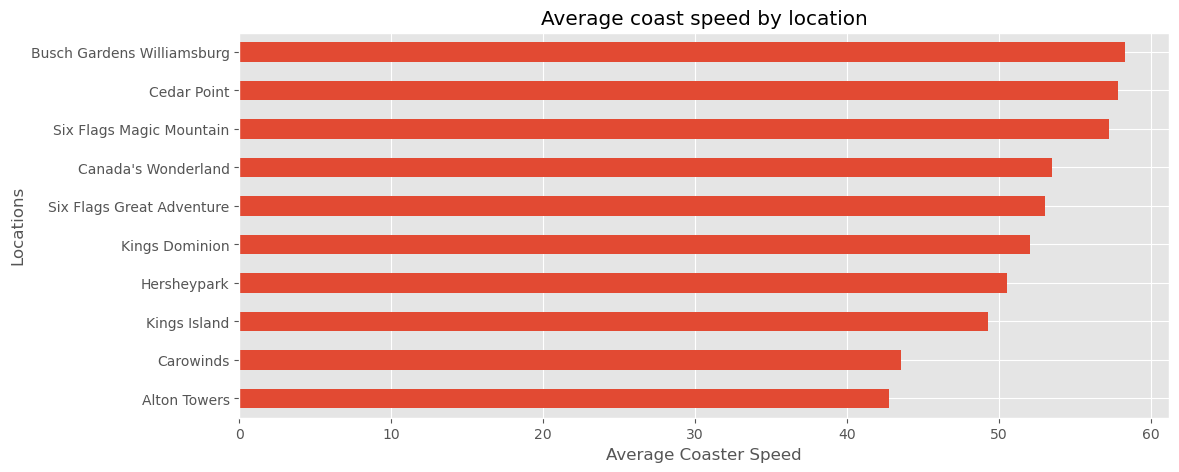

In [25]:
ax = df.query('Location != "Other"')\
     .groupby('Location')['Speed_Mph']\
      .agg(['mean', 'count']).query('count>=10')\
      .sort_values('mean')['mean']\
      .plot(kind='barh', figsize =(12,5), title='Average coast speed by location')
ax.set_xlabel('Average Coaster Speed')
ax.set_ylabel('Locations')
plt.show()
     